# Stable Organizations in Cognitive Science and Theoretical Biology

##### Connor McShaffrey & Eden Forbes

In [ ]:
%pip install tellurium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 121 kB 7.7 MB/s 
     |████████████████████████████████| 2.1 MB 17.0 MB/s 
     |████████████████████████████████| 36.7 MB 52.6 MB/s 
     |████████████████████████████████| 121 kB 62.2 MB/s 
     |████████████████████████████████| 121 kB 41.9 MB/s 
     |████████████████████████████████| 121 kB 28.9 MB/s 
     |████████████████████████████████| 3.3 MB 32.3 MB/s 
     |████████████████████████████████| 2.6 MB 54.8 MB/s 
     |████████████████████████████████| 4.3 MB 39.9 MB/s 
     |████████████████████████████████| 5.6 MB 22.5 MB/s 
     |████████████████████████████████| 54.8 MB 172 kB/s 
     |████████████████████████████████| 6.8 MB 38.6 MB/s 
     |████████████████████████████████| 3.2 MB 43.7 MB/s 
     |████████████████████████████████| 1.6 MB 36.5 MB/s 


In [ ]:
import numpy as np
import tellurium as te
import matplotlib.pyplot as plt

## Context for the Notebook

Understanding how organisms adapt and survive in a complex and demanding environment is a central goal in both organismal biology and cognitive science. Generally, the way this is handled is by taking the physical self-maintenance of the agent for granted and focusing on behavior (Beer, XXXX), or going beneath the level of the organism to focus on particular mechanisms (XXXX).
Both of these strategies are necessary, but necessarily incomplete on their own as they do not confront the system-level properties that describe organisms as a collection of physical processes that continue to renew the very constituents that enable those same processes (Maturana & Varela, XXXX; Beer, XXXX). Ultimately, the physical limits of an organism, and the dynamics of its behavior, are deeply tied to the time evolution of the processes that underlie its overall organization. A number of theoretical paradigms have been proposed to do this, including but not limited to autopoiesis (Maturana & Varela, XXXX; Beer, XXXX), metabolism-repair systems (Rosen, XXXX; Louie, XXXX), autocatalytic sets (Kauffman, XXXX), and chemoton theory (Ganti, XXXX). Many of these frameworks have made remarkable progress, but none fully encompass the others, and all are incomplete.


While there are various lines of research that attempt to develop frameworks such as those above within the confines of concrete chemical systems, another complimentary research direction is proposed by the subfields *Artificial Life* (ALife) and *Artificial Chemistry* (AChem):



*   **ALife:** A research program dedicated to understanding autonomous systems and their viability by attempting to abstract fundamental dynamical principles in biology and replicating them on other media, such as computers (Langton et al, 1991; Bourgine & Varela, XXXX).
*   **AChem:** An artificial chemistry is a man-made system that has similarities to a real chemical system and has a set of all possible molecules *S*, a set of reaction rules *R* that are the transformations allowed between members of *S*, and an algorithm *A* that determines how transformations are handled (deterministic, stochastic, aspatial vs spatial, etc.) (Dittrich, 2001).

Drawing on this history, the following notebook will use artificial chemistries and mass-action kinetics to offer an introduction to the foundations of Chemical Organisation Theory (Dittrich et al, 2007), a static analysis that attempts to understand collectively self-maintaining processes, dynamical systems theory, and their intersection. General knowledge that is assumed includes what a derivative is and the general formalism for mass-action kinetics. The outline of the notebook will be:



1.   An Quick and Dirty Introduction to Equilibria & Numerical Methods in Dynamical Systems (1-2D)
2.   Chemical Organisation Theory and its Relation to Equilibria
3.   ~ Algorithms for Finding Chemical Organisations
4.   ~ Finding Chemical Organisations in Arbitrary Artificial Chemistries

Let's begin!

## Section 1: What is a Dynamical System???

In general, a dynamical system is best defined as any system that changes in time. These systems can be deterministic, stochastic, spatial, aspatial, discrete, or continuous. Since we are relying on mass-action kinetics, this introduction will be focused on deterministic, continuous systems. 

In general, it is sometimes possible to solve a system of ordinary differential equations (ODEs) analytically in closed form (pen and paper work fine), but this is often not the case for sufficiently nonlinear systems, and most phenomena in nature fall into this difficult category! Not only that, but even within the cases where it is possible to solve nonnumerically, sometimes things can get unwieldy very quickly. For that reason, this quick-and-dirty introduction will emphasize how to begin dealing with dynamical systems numerically. 


#### Systems of Ordinary Differential Equations (ODEs)


In order to understand a system of ODEs, it is important to first understand the structure of an ODE in general. An ODE describes the time-evolution of a ***state-variable*** (purple) a moving part in the dynamical system. The parts of the equation that remain fixed are called ***parameters*** (orange). Sometimes the initial state of the system is also called a parameter, although this terminology is less universal. An ODE's right hand side, the function that governs it, can take any number of parameters and can also take each state-variable of the system as an input, or no state at all. 

\begin{align*}
\color{purple}{\frac{dS}{dt}} &= \color{purple}{S}\color{orange}{(0.3)}\\
\end{align*}

A dynamical system is comprised of a system of one or more ODEs with no upper bound. Each state-variable of the system has its own governing ODE, and the number of ODEs there are is used to define the *dimensionality* of the system.For example, consider the following set of equations with the same color scheme as above:

\begin{align*}
\color{purple}{\frac{dS_1}{dt}} &= \color{purple}{S_1}\color{orange}{(P_1)}\\
\end{align*}

\begin{align*}
\color{purple}{\frac{dS_2}{dt}} &= \color{purple}{S_2}\color{orange}{(P_2)}- \color{purple}{S_1}\color{orange}{(P_3)}\\
\end{align*}

Here we have a two-dimensional dynamical system with three parameters. The state of the system is a represented by the states of all of its state-variables. In principle, there is no upper bound on the dimensionality of systems we can model. For example, imagine that we wanted to make a model of the human brain at the level of individual cells. Just accounting for neurons (note that other cells, such as glia, also play important roles) this gives a lower bound for a ~100-billion-dimensional dynamical system! There is also the question of how biophysically realistic we want the neurons to be. If we are hoping to use neural components that have spiking behavior, this often assumes that each neuron on its own is governed by at least two ODEs. Note that, as modelers, our job is not to reproduce the exact thing we are trying to understand, but to capture some essence of it that offers new insights.

##### Intuition Check! For the following systems, how many dimensions would my ODE model be?

**NOTE: NEED TO MAKE THESE EXERCISES INTERACTIVE**

1. I want to understand how the human population grows and shrinks over time. For simplicity, I only consider rates of birth and death.

**Three Options: 1, 2, 3+**

Correct Answer: 1D! 

2. I want to model how the populations of deer and wolves interact over time.

Correct Answer: 2D!

To kick things off, let's lay down a couple of ground rules for systems of ODEs:
1. **Existence and Uniqueness Theorem:** Although we will not define it here, trajectories of a dynamical system in principle cannot cross. 
2. **Smoothness of the Solutions**: Solution trajectories for the system should be smooth (no jagged edges).

- **Intuition Check!** Below we sketch out a series of trajectories. 

#### How Can We Visualize Dynamical Systems?

In general, we can talk about a dynamical system in terms of time series and state-space. When we are looking at a time series, the x-axis is for time, and the y-axis is for the value of the state variables. In this case, each state variable has its own line. Taking a two dimensional system:

\begin{align*}
\color{purple}{\frac{dS_1}{dt}} &= f(...)\\
\end{align*}

\begin{align*}
\color{purple}{\frac{dS_2}{dt}} &= f(...)\\
\end{align*}

We might get something like the following time-series: 



In [ ]:
r = te.loada('''
    J1: -> S1; k1/(1+S2^n1) - k2*S1;
    J2: -> S2; k3/(1+S1^n2) - k4*S2;
    S1 = 4; S2 = -4;
    k1 = 12; k3 = 12; k2 = 2; k4 = 2
    n1 = 4; n2 = 4
''')

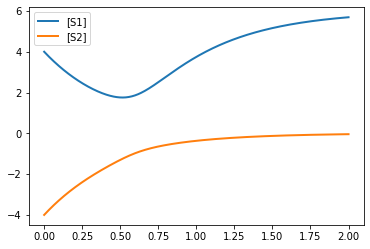

In [ ]:
m = r.simulate(0,2,500)
r.plot(m)

Another option is to 

#### How Do We Get Trajectories Numerically?

In general, there are two ground rules we have to keep in mind when talking about the time-evolution of a deterministic and continuous dynamical system:

1. **Existence and Uniqueness Theorem:** For any initial value of the state-variables, there is a unique solution. This means trajectories cannot cross and a given value will always result in the same trajectory.
2. **Smoothness of the Trajectory:** Trajectories in an ODE model work within a continuous state-space, and therefore should not show the jagged lines characteristic of discrete jumps.



##### Intuition Check! Do the following sketched time evolutions abide by the ground rules outlined above? 

1. Time series for a population of predator and prey.

2. Trajectories in state-space without crossing.

3. Trajectories in state-space with crossing.

4. Trajectories in state-space with convergence. 

5. Trajectories with sharp edges. 

### Section 1.1: Dynamics in One Dimension

### Section 1.2 Dynamics in Two Dimensions